<a href="https://www.kaggle.com/code/anshtanwar/overfitting-explained-beginners-tutorial?scriptVersionId=138323113" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Overfitting: A Short and Clear Tutorial 
<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">Thanks for Visting this Notebook :)
<div class="alert alert-block alert-info" style="font-size:20px; font-family:verdana;">
    Feel free to fork or edit the notebook.If you liked the notebook please upvote and comment your valuable feedbacks. It helps other people discover them.
</div>

# <div style="background-color:#fff1cc; padding: 12px;">What is Overfitting?</div> 


⭐Overfitting is a phenomenon in statistical modeling and machine learning where a model becomes too complex and starts to memorize the noise and random fluctuations present in the training data, rather than capturing the underlying patterns that generalize well to new, unseen data. In simpler terms, an overfitted model performs extremely well on the training data but performs poorly on new data because it has essentially "memorized" the training data instead of learning the true relationships.

# <div style="background-color:#fff1cc; padding: 20px;">Explanation with Mathematics and Logic: </div> 

**⭐Mathematical Notation**:
Let's consider a simple linear regression problem with one independent variable (X) and one dependent variable (y). The goal is to fit a straight line to the data.

The linear regression model can be represented as:

- y = β₀ + β₁ * X

where β₀ and β₁ are the coefficients (intercept and slope) of the line.

Explanation:
The process of overfitting occurs when the model becomes too complex, leading to a higher degree of freedom (more parameters) and flexibility to fit the data. This complexity allows the model to fit not only the underlying pattern but also the noise and randomness in the data.

**- ⭐Underfitting (Low Complexity Model)**:
If the model is too simplistic, like using a straight line to fit a highly non-linear dataset, it fails to capture the true relationship between X and y. This is known as underfitting. The model lacks the capacity to represent the underlying complexities in the data, leading to poor performance.

**- ⭐Optimal Fit (Moderate Complexity Model)**:
A moderately complex model, like a polynomial regression with an appropriate degree, can capture the general patterns and relationships present in the data. This model balances bias and variance and generalizes reasonably well to unseen data.

**- ⭐Overfitting (High Complexity Model)**:
When the model becomes too complex, like a high-degree polynomial regression or a deep neural network, it has the ability to fit the training data very closely. It fits not just the underlying patterns but also the noise, making it highly sensitive to fluctuations in the training data. As a result, when the model encounters new data, it performs poorly because it fails to generalize beyond the training set.



# <div style="background-color:#fff1cc; padding: 20px;">Let's visualize overfitting using a simple dataset and a polynomial regression model.</div> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the Iris dataset
iris = sns.load_dataset('iris')

X = iris['sepal_length'].values
y = iris['petal_width'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for the model
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)


# <div style="background-color:#fff1cc; padding: 20px;">Visualize the Data</div> 

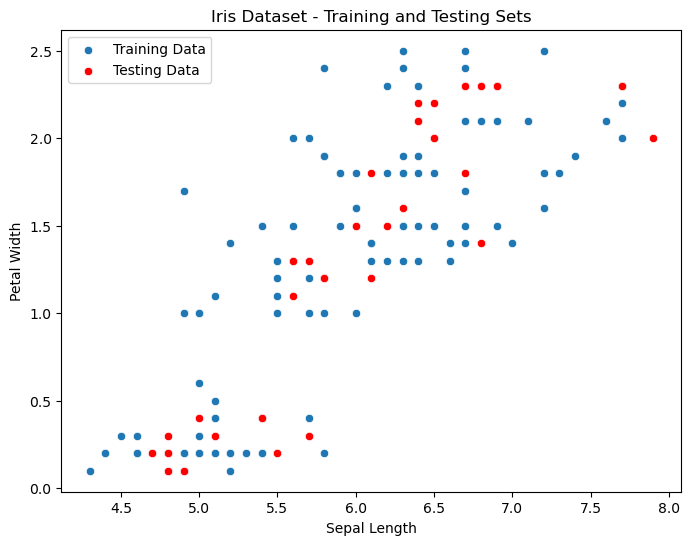

In [3]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Training Data')
sns.scatterplot(x=X_test.flatten(), y=y_test, color='red', label='Testing Data')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Iris Dataset - Training and Testing Sets')
plt.legend()
plt.show()


# <div style="background-color:#fff1cc; padding: 20px;">Fit Polynomial Regression Models of Different Degrees</div> 

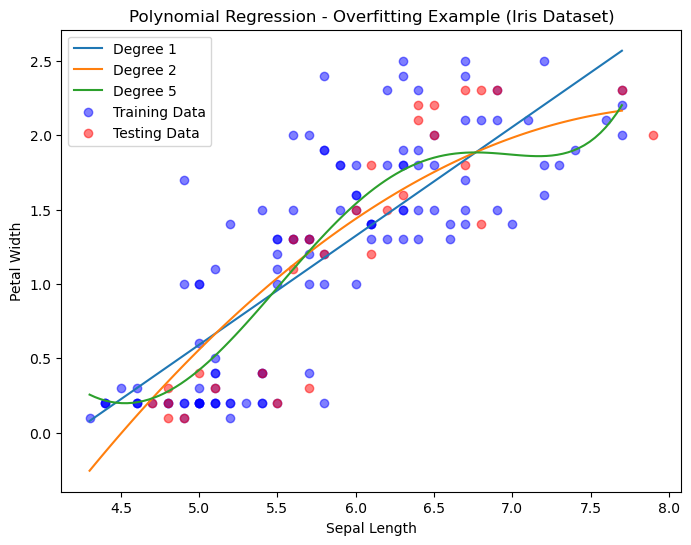

In [4]:
degrees = [1, 2, 5]
plt.figure(figsize=(8, 6))

for degree in degrees:
    # Transform features to polynomial
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train[:, 0].reshape(-1, 1))

    # Train the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

   
    #using the original data points directly will not give you a smooth curve 
    #because the original data points are discrete and scattered.
    #Generate new data points for plotting the smooth curve
    X_plot = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)

    # Predict on the new data points
    y_plot = model.predict(X_plot_poly)

    # Plot the fitted curve using the smooth curve
    plt.plot(X_plot, y_plot, label=f'Degree {degree}')


plt.scatter(X_train, y_train, label='Training Data', color='blue', alpha=0.5)
plt.scatter(X_test, y_test, label='Testing Data', color='red', alpha=0.5)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Polynomial Regression - Overfitting Example (Iris Dataset)')
plt.legend()
plt.show()


# <div style="background-color:#fff1cc; padding: 20px;">Analyze Overfitting</div> 

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

In the graph, we plotted three polynomial regression models of different degrees: 1, 2, and 5.

* Degree 1: The blue line represents a linear model, which may be underfitting the data as it cannot capture the underlying pattern.
* Degree 2: The orange line represents a quadratic model, which captures the general trend of the data.
* Degree 5: The green line represents a high-degree polynomial model that fits the training data closely, capturing noise and fluctuations.

In [5]:
for degree in degrees:
    # Transform features to polynomial
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)

    # Train the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predict on testing data
    y_test_pred = model.predict(poly_features.transform(X_test))

    # Calculate Mean Squared Error on testing data
    mse = mean_squared_error(y_test, y_test_pred)
    print(f"Degree {degree}: Mean Squared Error = {mse:.4f}")


Degree 1: Mean Squared Error = 0.1541
Degree 2: Mean Squared Error = 0.1303
Degree 5: Mean Squared Error = 0.1254


<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">


- The Mean Squared Error (MSE) values for each model will likely show that the degree 5 model has the lowest MSE on the training data but a much higher MSE on the testing data compared to the simpler models. This difference in MSE indicates overfitting.

- In this example, we demonstrated overfitting using a polynomial regression model on the Iris dataset. The degree 5 polynomial overfits the training data by capturing noise and fluctuations, leading to poor generalization to new, unseen data. It's essential to balance model complexity and generalization to avoid overfitting and build robust machine learning models.